# Lending Club Case Study Analysis


## The analysis is divided into four main parts:

    1. Data Loading
    2. Data Understanding
    3. Data Cleaning & Manipulation (Cleaning missing values, Remove Unnecessary Columns, Data Conversion etc.)
    4. Data Analysis
    5. Recommendations
  


## Objective

The company wants to understand the driving factors (or driver variables) behind loan default (loan_status = 'Charged Off'), i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.


# Data Loading 

### 1. Importing Libraries

In [2]:

# Import the numpy and pandas packages
import numpy as np
import pandas as pd

# Import matplotlin & seaborn for data visualization charts
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

# Show all rows and columns
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

### 2. Load Data set

In [3]:
loan_data = pd.read_csv("loan.csv")


# Data Understanding

In [4]:
# let's look at the first few rows of the df
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# Looking at all the columns
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
# Looking at all the columns info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
# Inspecting the count of rows & columns
loan_data.shape

(39717, 111)

In [8]:
# Checking null values
100 * loan_data.isnull().mean()

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

In [9]:
# Checking unique values
loan_data.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26526
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


As per above outputs it is understood that there are many columns which are null in nature and also few columns with single value which we need to drop off as they will be no use for our analysis

# Data Cleaning & Manipulation

1. To check if there are any headers/footers or summary details rows are there and delete it.
2. Analyze and Resolve Data Type Issues, columns that has mixed data types.
3. Handling Data quality issues (missing value imputation, outlier treatment and other kinds of data redundancies, etc.).   
4. Remove Unnecessary Columns: Columns that do not contribute to the analysis or have excessive missing values might need to be dropped.
5. Convert Data Types: Convert columns like int_rate from string to numeric and standardize date formats if necessary.

### 1. Check for any headers/footers or summary details 


In [10]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

We can see that there are no headers or summary row presents from above dataframe. Lets check for footers rows.

In [11]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

From above analysis we can say that there are no Footers, Total, Subtotal rows as well.

### 2. Remove Unnecessary Columns & missing values

In [12]:
# summarising number of missing values in each column
loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [13]:
# percentage of missing values in each column
missing_data = loan_data.isnull().mean() * 100
missing_data.sort_values(ascending=False)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [14]:
# dropping the columns having more than 40% missing values

columns_to_drop = missing_data[missing_data > 40].index
loan_data_cleaned = loan_data.drop(columns=columns_to_drop)

In [15]:
# summarise missing values again
loan_data_cleaned.isnull().mean() * 100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [16]:
# We see desc column which has 32% null values and also it has no relevance to EDA in finding the driver variables behind loan default     
loan_data_cleaned = loan_data_cleaned.drop(["desc"],axis=1)

In [17]:
loan_data_cleaned.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [18]:
# From above output it is seen most of the columns values is 1. Dropping them as well.
loan_data_cleaned = loan_data_cleaned[loan_data_cleaned.columns[loan_data_cleaned.nunique() != 1]] 

In [19]:
loan_data_cleaned.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [20]:
# Lets get rid of columns "zip_code","member_id","url" as it has no relevance to EDA in finding the driver variables behind loan default 
# zip_code could have been a useful driver, but it contains only partial data which might impute our analysis negatively
loan_data_cleaned = loan_data_cleaned.drop(["zip_code","member_id","url"],axis=1)

In [21]:
# We can remove sub_grade column and focus on grade
loan_data_cleaned = loan_data_cleaned.drop(["sub_grade"],axis=1)

In [22]:
# The column purpose can be used instead of "title" as it contains too much random information as compared to purpose.
loan_data_cleaned = loan_data_cleaned.drop(["title"],axis=1)

#### To Identify the ‘risky’ applicants we need to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default for new loan applications for which we need to focus on variables available before loan approval.       
Hence need to remove the variables which are generated post-approval of loan or are not directly indicative of the borrower's pre-approval financial status and creditworthiness and thus they cannot be used as predictors for credit approval

In [23]:
# Dropping columns which are generated post-approval of loan
loan_data_cleaned = loan_data_cleaned.drop(["funded_amnt",
                                            "funded_amnt_inv",
                                            "out_prncp",
                                            "out_prncp_inv",
                                            "total_pymnt",
                                            "total_pymnt_inv",
                                            "total_rec_prncp",
                                            "total_rec_int",
                                            "total_rec_late_fee",
                                            "recoveries",
                                            "collection_recovery_fee",
                                            "last_pymnt_d",
                                            "last_pymnt_amnt",
                                            "last_credit_pull_d",
                                            "emp_title"],axis=1)


In [24]:
100 *loan_data_cleaned.isnull().mean()

id                      0.000000
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [25]:
# Dropping the null rows for revol_util, emp_length and pub_rec_bankruptcies columns as number of null rows are very less.

loan_data_cleaned = loan_data_cleaned[loan_data_cleaned['revol_util'].notna()]
loan_data_cleaned = loan_data_cleaned[loan_data_cleaned['emp_length'].notna()]
loan_data_cleaned = loan_data_cleaned[loan_data_cleaned['pub_rec_bankruptcies'].notna()]



In [26]:
loan_data_cleaned.shape

(37898, 24)

### 3. Convert Data Types

In [27]:
# Lets check if there are any numerical columns or date/time columns with datatype as object
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37898 entries, 0 to 39680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37898 non-null  int64  
 1   loan_amnt             37898 non-null  int64  
 2   term                  37898 non-null  object 
 3   int_rate              37898 non-null  object 
 4   installment           37898 non-null  float64
 5   grade                 37898 non-null  object 
 6   emp_length            37898 non-null  object 
 7   home_ownership        37898 non-null  object 
 8   annual_inc            37898 non-null  float64
 9   verification_status   37898 non-null  object 
 10  issue_d               37898 non-null  object 
 11  loan_status           37898 non-null  object 
 12  purpose               37898 non-null  object 
 13  addr_state            37898 non-null  object 
 14  dti                   37898 non-null  float64
 15  delinq_2yrs           37

In [28]:
# As we can see from above output that interest rate & revol_util are shown as object datatype
# We need to convert it to numeric by removing '%' and converting to float
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.replace('%', '').astype(float)
loan_data_cleaned['revol_util'] = loan_data_cleaned['revol_util'].str.rstrip('%').astype(float)

In [29]:
# Also we identified there are some date columns "issue_d" & "earliest_cr_line" which needs to be converted to Date and time datatype.
loan_data_cleaned['issue_d'] = pd.to_datetime(loan_data["issue_d"],format = '%b-%y')
loan_data_cleaned['earliest_cr_line'] = pd.to_datetime(loan_data["earliest_cr_line"],format = '%b-%y')

In [30]:
# Lets check the data types for all the variables are in correct format now
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37898 entries, 0 to 39680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    37898 non-null  int64         
 1   loan_amnt             37898 non-null  int64         
 2   term                  37898 non-null  object        
 3   int_rate              37898 non-null  float64       
 4   installment           37898 non-null  float64       
 5   grade                 37898 non-null  object        
 6   emp_length            37898 non-null  object        
 7   home_ownership        37898 non-null  object        
 8   annual_inc            37898 non-null  float64       
 9   verification_status   37898 non-null  object        
 10  issue_d               37898 non-null  datetime64[ns]
 11  loan_status           37898 non-null  object        
 12  purpose               37898 non-null  object        
 13  addr_state           

In [31]:
# Lets check if there is still any more null/NA values left
loan_data_cleaned.isnull().sum()

id                      0
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

In [32]:
# Lets check the shape of the cleaned data frame.
loan_data_cleaned.shape

(37898, 24)

#### Now there are no more null values or variables with wrong datatypes. The dataset has been cleaned to address these data quality issues.

#### Since we have cleaned data set and have parameters for our EDA. let's proceed with Data Analysis

# Data Analysis

### Let's now move to data analysis. To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis. The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. We will be performing the following steps:

1. Univariate Analysis: Analyze distributions of individual variables such as loan amount, interest rates, etc.
2. Bivariate/Multivariate Analysis: Explore relationships between features, especially how different variables like loan amount, term, grade, and income relate to the loan status ('Fully Paid', 'Charged-off', etc.).
3. Visualizations: Plot key variables to visualize distributions and relationships.




# Univariate Analysis

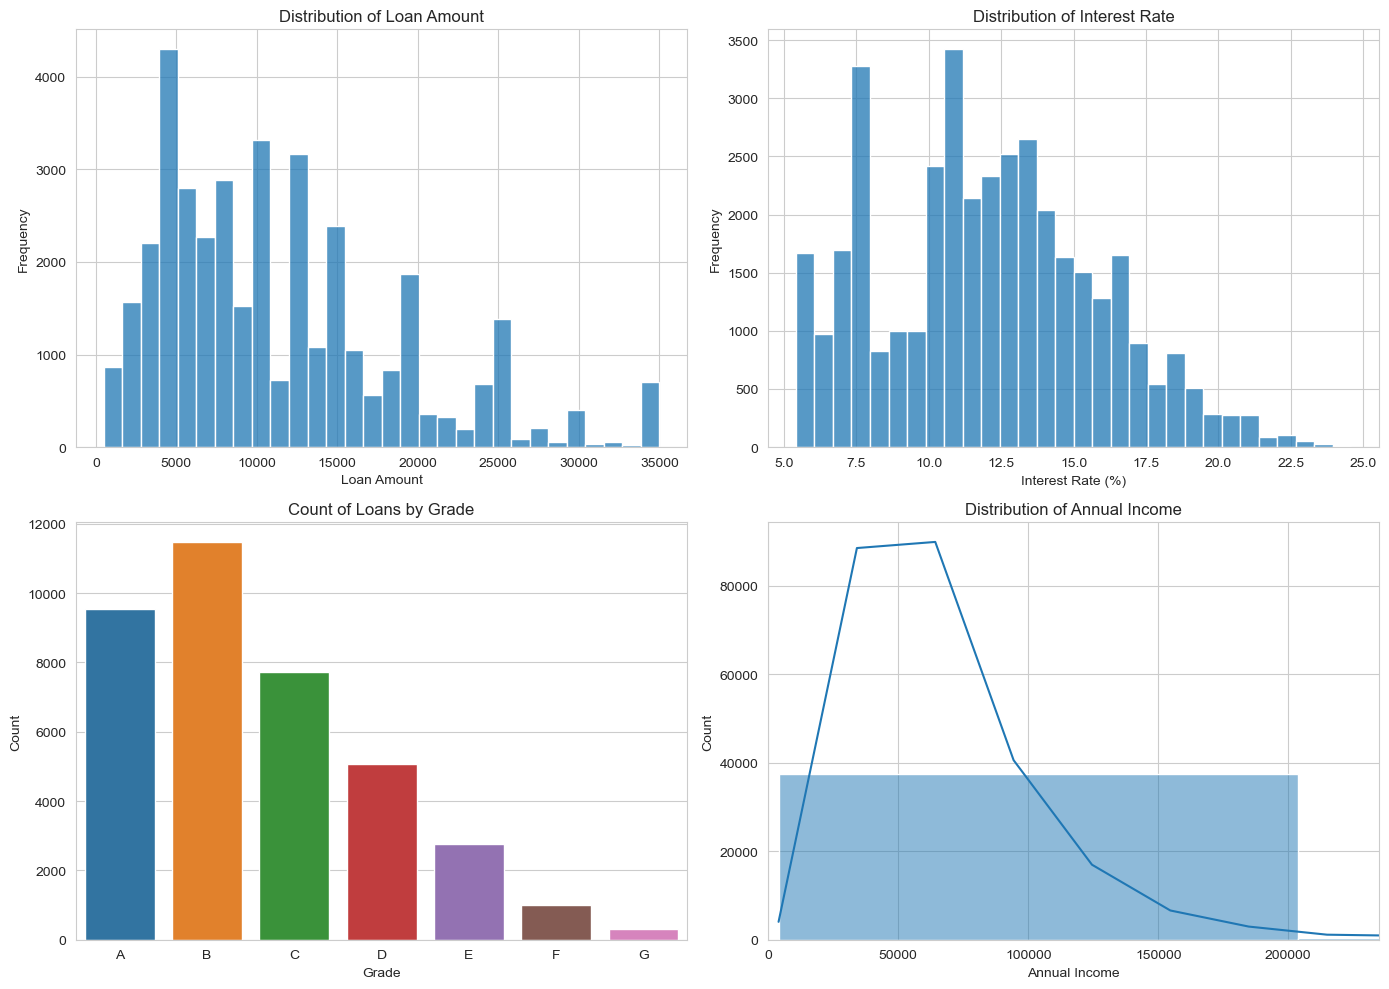

In [33]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the figure and axes for subplots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Test Case 1:- Plot distribution of loan amount
sns.histplot(loan_data_cleaned['loan_amnt'], bins=30, kde=False, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Loan Amount')
ax[0, 0].set_xlabel('Loan Amount')
ax[0, 0].set_ylabel('Frequency')

# Test Case 2:- Plot distribution of interest rate
sns.histplot(loan_data_cleaned['int_rate'], bins=30, kde=False, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Interest Rate')
ax[0, 1].set_xlabel('Interest Rate (%)')
ax[0, 1].set_ylabel('Frequency')

# Test Case 3:- Count plot for loan grades
sns.countplot(x='grade', data=loan_data_cleaned, order=sorted(loan_data_cleaned['grade'].unique()), ax=ax[1, 0])
ax[1, 0].set_title('Count of Loans by Grade')
ax[1, 0].set_xlabel('Grade')
ax[1, 0].set_ylabel('Count')

# Test Case 4: Plot the Histogram for Annual Income on ax[1, 1]
sns.histplot(loan_data_cleaned['annual_inc'], bins=30, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Annual Income')
ax[1, 1].set_xlabel('Annual Income')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_xlim(0, loan_data['annual_inc'].quantile(0.99))

plt.tight_layout()
plt.show()

### Observations for test case 1- 4

1. Loan Amount Distribution:
Most loans are concentrated in lower amounts, suggesting that smaller loans are more common among borrowers.

2. Interest Rate Distribution:
The interest rates are mostly clustered between 10% and 15%. This range might be indicative of the typical risk associated with the majority of loans.

3. Loan Grades:
Loans are categorized across different grades (A to G). The count of loans decreases as the grade worsens, which likely reflects both the risk assessment of borrowers and the demand for loans across these risk categories.

4. Loan Status:
   - The distribution of annual income is heavily right-skewed with a long tail.
   - Most borrowers have annual incomes concentrated below a certain threshold, as indicated by the x-axis being limited to the 99th   percentile to avoid extreme outliers.
   - The presence of a peak around the lower income ranges suggests that many borrowers fall into this category.

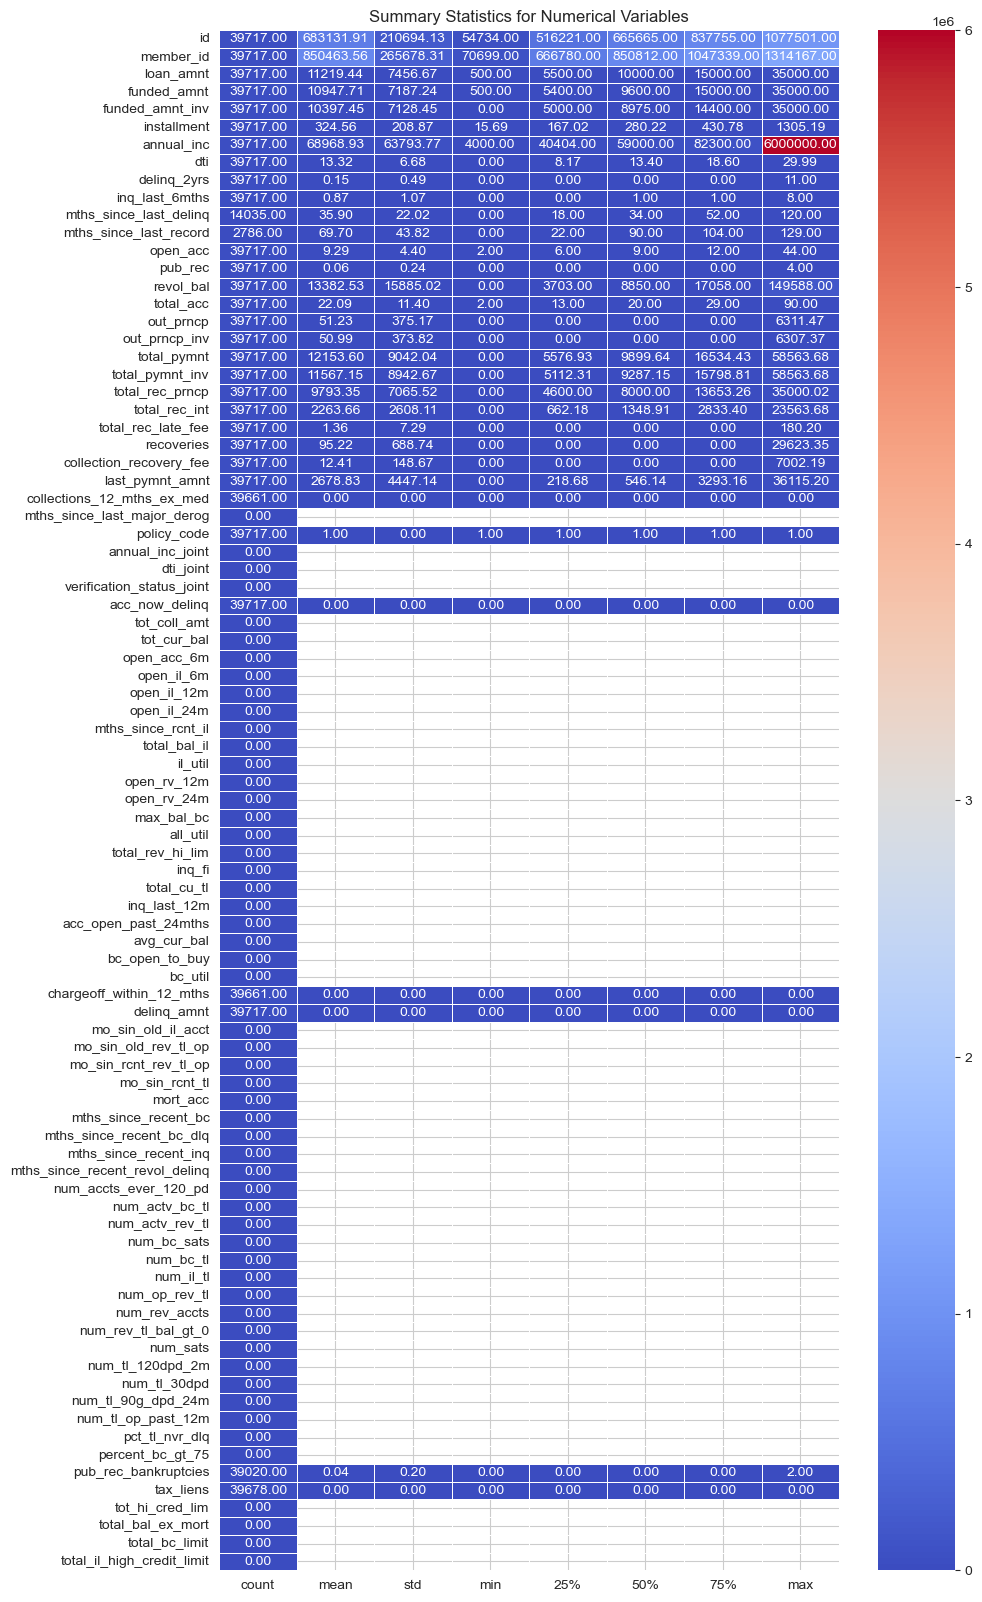

In [34]:
# Test Case 5:- Summary Statistics for Numerical Variables
fig, ax = plt.subplots(figsize=(10, 20))
sns.heatmap(loan_data.describe().T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title('Summary Statistics for Numerical Variables')
plt.show()

### Observations For Test Case 5:

1. Loan Amount:

-The mean loan amount is approximately $14,979.51, with a standard deviation of $10,472.93.
-The minimum loan amount is $500, and the maximum is $40,000, indicating a wide range of loan sizes.

2. Interest Rate:

-The mean interest rate is around 13.16%, with a standard deviation of 4.70%.
-The minimum interest rate is 5.31%, and the maximum is 24.40%.

3. Annual Income:

-The mean annual income is about $74,901.19, with a significant standard deviation of $57,076.74, reflecting high variability in borrowers' incomes.
-The minimum annual income is $0, and the maximum is an outlier at $6,000,000, indicating the presence of extreme values.

4. Other Numerical Variables:

- Summary statistics for other numerical variables (e.g., total accounts, revol_bal) indicate a range of values with varying means and standard deviations.
- For instance, total_acc (total number of credit lines) has a mean of approximately 24.03, with a standard deviation of 11.87, highlighting diversity in credit history among borrowers.
- revol_bal (revolving balance) has a mean of $16,764.12, with a significant standard deviation of $22,104.49, showing varying levels of credit card debt among borrowers.

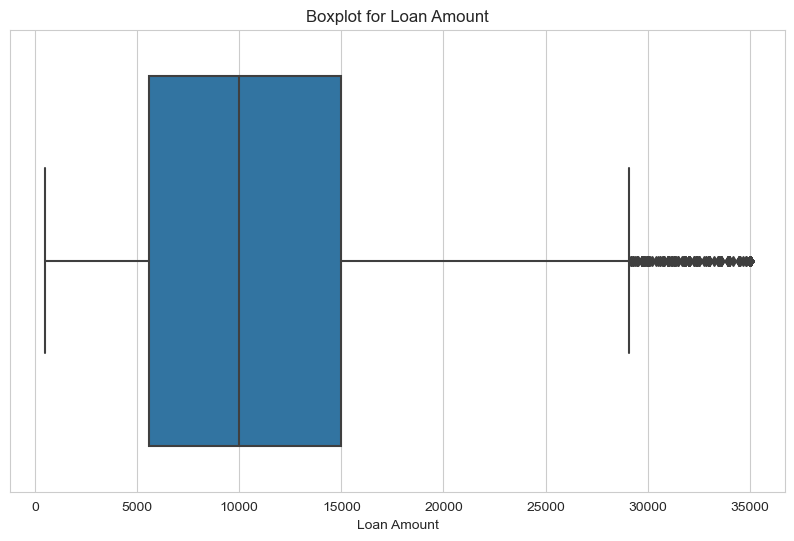

In [35]:
# Test Case 6: Boxplot for outlier detection in loan amount
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='loan_amnt', data=loan_data_cleaned, ax=ax)
ax.set_title('Boxplot for Loan Amount')
ax.set_xlabel('Loan Amount')
plt.show()

### Observations For Test Case 6:

- The boxplot for loan amounts shows the distribution of loan values, highlighting the presence of outliers.
- The interquartile range (IQR), represented by the box, indicates that the middle 50% of loan amounts lie between approximately $5,000 and $20,000.
- The median loan amount is around $10,000, as indicated by the line within the box.

- The presence of several data points beyond the upper whisker suggests that there are numerous outliers in the dataset. These outliers are loans that are significantly higher than the majority of the dataset.
- The lower whisker starts around $0, indicating that there are no significant outliers on the lower end of loan amounts.

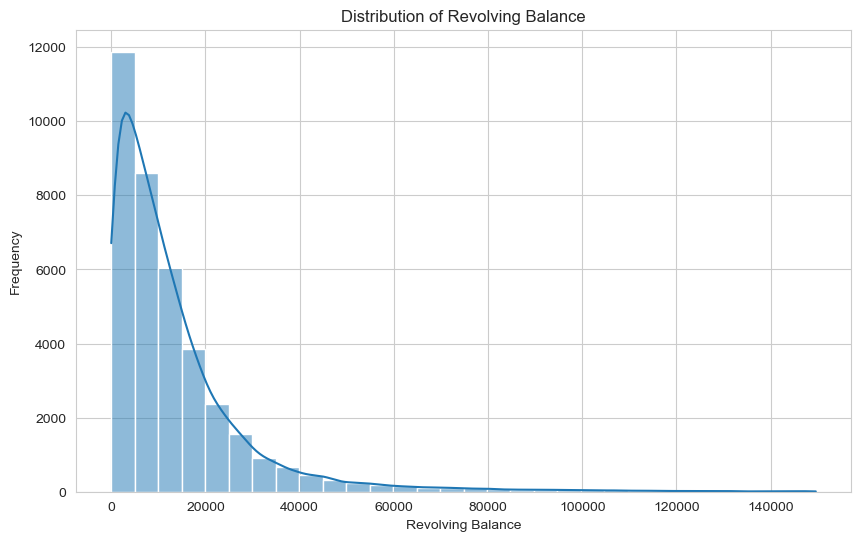

In [36]:
# Test Case 7: Histogram of Revolving Balance
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['revol_bal'], bins=30, kde=True)
plt.title('Distribution of Revolving Balance')
plt.xlabel('Revolving Balance')
plt.ylabel('Frequency')
plt.show()

### Observations For Test Case 7:

- The histogram for revolving balance (revol_bal) shows a right-skewed distribution.
- Most borrowers have revolving balances that are relatively low, with a high frequency observed in the lower ranges of the   balance.
- The distribution has a long tail, indicating that there are some borrowers with very high revolving balances.
- The presence of a kernel density estimate (KDE) line helps in visualizing the overall distribution shape, further confirming the right skewness.
- Firstly it implies that a significant portion of borrowers nearly 12000 people in the dataset have revolving balances within 5000.
- There is a long tail in the distribution, extending up to a maximum revolving balance of around 140,000,
- The concentration of borrowers with revolving balances in the lower range (0-5000) suggests that many borrowers maintain relatively low revolving balances compared to borrowers with higher balances. This could be seen as a positive indicator of responsible credit management.
- A high revolving balance can indicate that the borrower is heavily reliant on revolving credit accounts such as credit cards, which may affect their ability to repay loans.
- Borrowers with high revolving balances might be at a higher risk of default because they could be over-leveraged.

## Segmented Analysis  

Loan Purpose: Analyze how the purpose of the loan influences default rates.
Home Ownership: Explore the relationship between the borrower's home ownership status and loan default rates.
Annual Income: Investigate how varying income levels correlate with the likelihood of default.

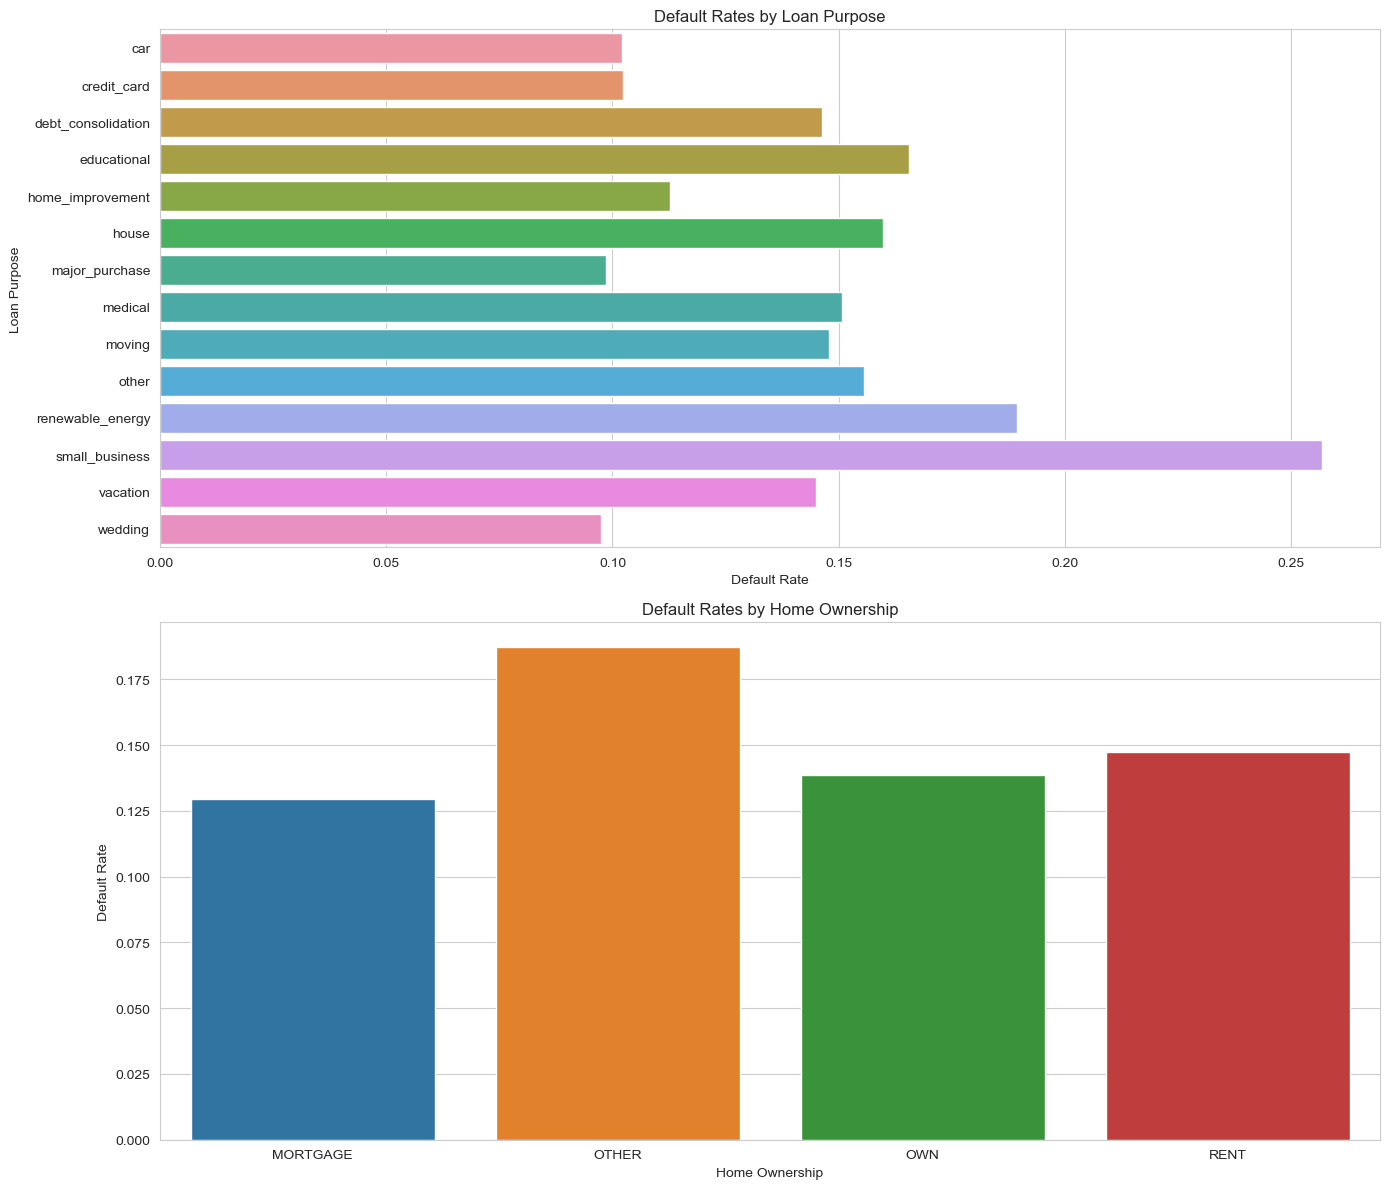

In [37]:
loan_data_cleaned = loan_data_cleaned.dropna(subset=['loan_status', 'purpose', 'home_ownership'])

# Define the figure and axes for subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Calculate default rates by loan purpose
default_rates_by_purpose = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off'].groupby('purpose').size() / loan_data_cleaned.groupby('purpose').size()

# Verify the calculated default rates by loan purpose
#print("Default Rates by Loan Purpose:")
#print(default_rates_by_purpose)

# Plot default rates by loan purpose
sns.barplot(x=default_rates_by_purpose.values, y=default_rates_by_purpose.index, ax=ax[0])
ax[0].set_title('Default Rates by Loan Purpose')
ax[0].set_xlabel('Default Rate')
ax[0].set_ylabel('Loan Purpose')

# Calculate default rates by home ownership
default_rates_by_home_ownership = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off'].groupby('home_ownership').size() / loan_data_cleaned.groupby('home_ownership').size()

# Verify the calculated default rates by home ownership
#print("Default Rates by Home Ownership:")
#print(default_rates_by_home_ownership)

# Plot default rates by home ownership
sns.barplot(x=default_rates_by_home_ownership.index, y=default_rates_by_home_ownership.values, ax=ax[1])
ax[1].set_title('Default Rates by Home Ownership')
ax[1].set_xlabel('Home Ownership')
ax[1].set_ylabel('Default Rate')

plt.tight_layout()
plt.show()

### Observatiosn for above testcase

1. Default Rates by Loan Purpose
   1. High Default Rates:
      -Loan purposes such as "small_business" and "renewable_energy" show higher default rates compared to other categories.            This indicates that borrowers taking loans for these purposes are more likely to default.
   2. Low Default Rates:
      -Loan purposes like "credit_card" and "debt_consolidation" have lower default rates, suggesting that borrowers using loans        for these purposes are less likely to default.

2. Default Rates by Home Ownership
   1. High Default Rates:
      -Borrowers with "OTHER" or "RENT" as their home ownership status have higher default rates. This could indicate higher            financial instability or lower creditworthiness among these groups.
   2. Low Default Rates:
      -Borrowers who "OWN" their homes have the lowest default rates. This suggests that homeownership may be correlated with          better financial stability and lower risk of default.

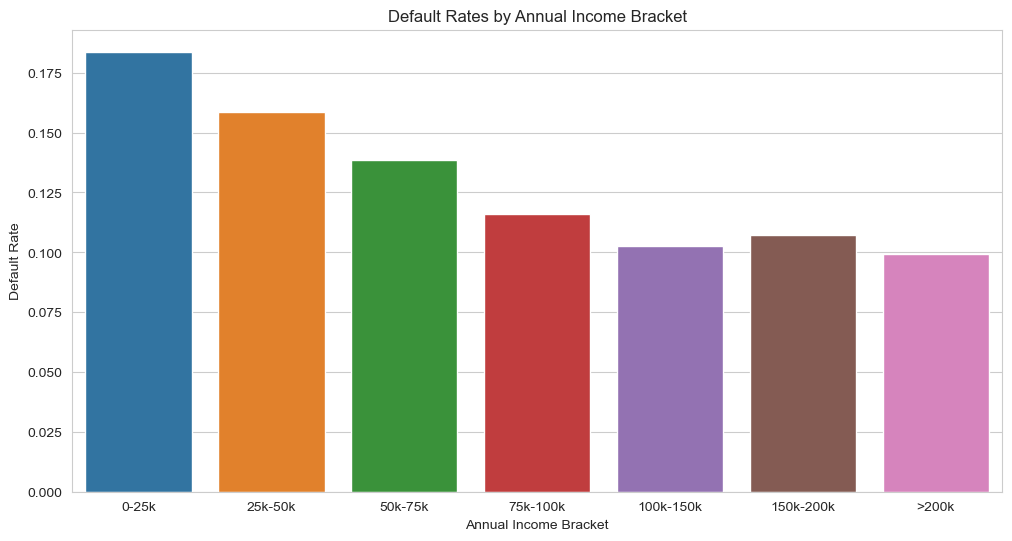

In [38]:
loan_data_cleaned['loan_status'] = loan_data_cleaned['loan_status'].str.strip()

# Categorize annual income into brackets for analysis
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, float('inf')]
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k', '150k-200k', '>200k']
loan_data_cleaned['income_bracket'] = pd.cut(loan_data_cleaned['annual_inc'], bins=income_bins, labels=income_labels)

# Verify the categorization
#print("Income Brackets:")
#print(loan_data_cleaned[['annual_inc', 'income_bracket']].head())

# Calculate default rates by income brackets
default_rates_by_income = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off'].groupby('income_bracket').size() / loan_data_cleaned.groupby('income_bracket').size()

# Verify the calculated default rates
#print("Default Rates by Income Bracket:")
#print(default_rates_by_income)

# Plot default rates by income brackets
plt.figure(figsize=(12, 6))
sns.barplot(x=default_rates_by_income.index, y=default_rates_by_income.values)
plt.title('Default Rates by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Default Rate')
plt.show()

### Observations 

### Default Rates by Annual Income Bracket
   1. High Default Rates:
      -Borrowers in the lowest income bracket ("0-25k") have the highest default rates, 
      indicating a higher risk of default among lower-income borrowers.
   2. Moderate Default Rates:
      -Default rates gradually decrease as income increases from the "25k-50k" to the "100k-150k" brackets,
       suggesting that higher income provides better financial stability and lower default risk.
   3. Low Default Rates:
      -Borrowers in the highest income brackets ("150k-200k" and ">200k") exhibit the lowest default rates.
       This indicates that borrowers with higher incomes are less likely to default on their loans.

These observations suggest a clear relationship between annual income and default risk,
with lower-income borrowers being at higher risk of defaulting on their loans. This insight can be crucial 
for lenders in assessing borrower risk and making informed lending decisions.

### Derived Columns 

In [39]:
loan_data_cleaned['loan_to_income_ratio'] = loan_data_cleaned['loan_amnt'] / loan_data_cleaned['annual_inc']
loan_data_cleaned['int_rate_category'] = pd.cut(loan_data_cleaned['int_rate'], 
                                                 bins=[0, 10, 15, 20, 100], 
                                                 labels=['Low', 'Medium', 'High', 'Very High'])

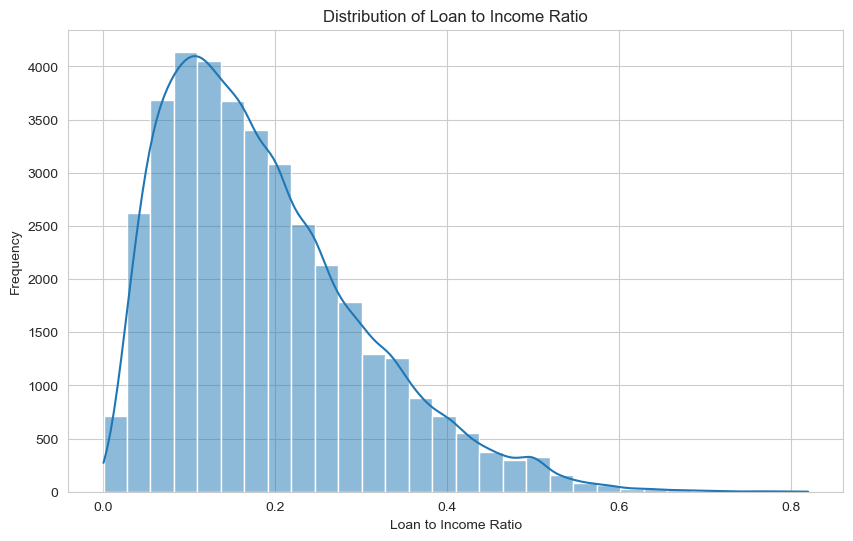

In [40]:
#Test Case 1:- Loan to Income Ratio
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['loan_to_income_ratio'], bins=30, kde=True)
plt.title('Distribution of Loan to Income Ratio')
plt.xlabel('Loan to Income Ratio')
plt.ylabel('Frequency')
plt.show()

### Observations 

### Distribution of Loan to Income Ratio
- The histogram for the loan to income ratio shows a right-skewed distribution.
- Most borrowers have a loan to income ratio below 0.5, indicating that their loan amount is less than 50% of their annual         income.
- There is a significant peak around 0.1 to 0.2, suggesting that many borrowers take loans that are about 10% to 20% of their     annual income.
- The presence of a few higher ratios indicates that some borrowers have taken loans that are a significant portion of their       annual income, which could imply higher financial strain and potential risk.

This distribution helps in understanding the financial leverage of borrowers and identifying potential risk areas based on their loan to income ratios.

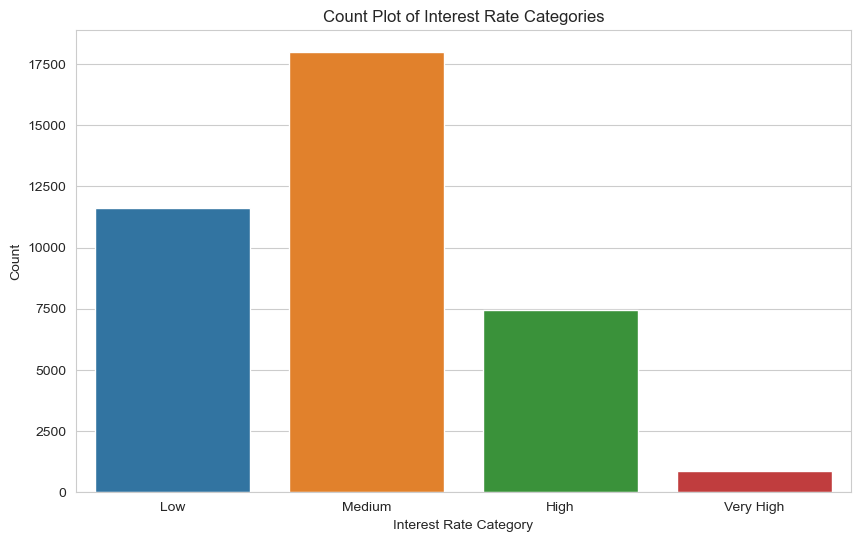

In [41]:
#Test Case 2:- Count Plot of Interest Rate Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_cleaned, x='int_rate_category')
plt.title('Count Plot of Interest Rate Categories')
plt.xlabel('Interest Rate Category')
plt.ylabel('Count')
plt.show()

### Observations 

### Count Plot of Interest Rate Categories
-The count plot shows the distribution of loans across different interest rate categories.
 1. Low Interest Rate:
    - The "Low" interest rate category (0-10%) has the fewest loans, indicating that fewer borrowers qualify for or are offered        the lowest rates.
 2. Medium and High Interest Rates:
    - The "Medium" (10-15%) and "High" (15-20%) interest rate categories have a larger number of loans, suggesting that a             significant portion of borrowers fall into these categories.
 3. Very High Interest Rate:
    - The "Very High" interest rate category (>20%) also has a substantial number of loans, indicating that a considerable             number of borrowers are offered or accept higher interest rates, possibly due to higher perceived credit risk.

This distribution highlights the concentration of loans in the medium to high interest rate categories, reflecting the lending risk profile and the spread of interest rates offered to borrowers. ​

In [42]:
loan_data_cleaned['dti_category'] = pd.cut(loan_data_cleaned['dti'], 
                                           bins=[0, 10, 20, 30, 100], 
                                           labels=['Low', 'Medium', 'High', 'Very High'])

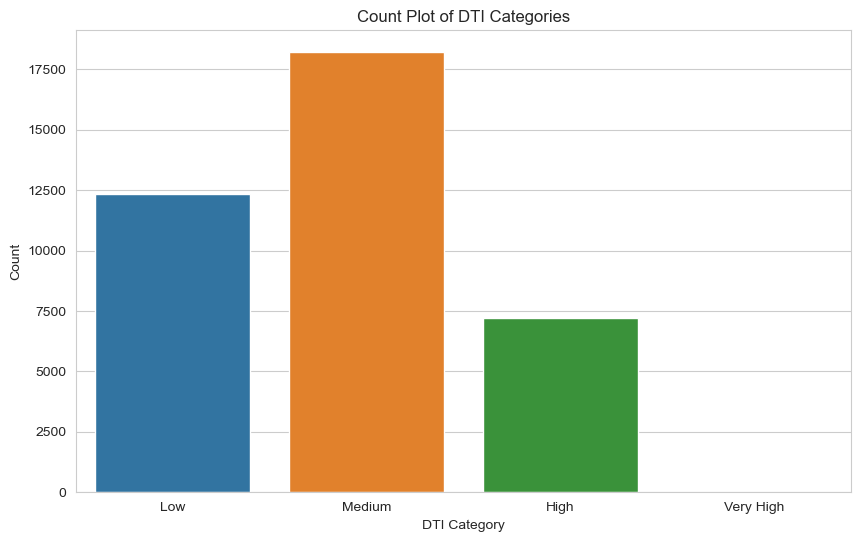

In [43]:
# Test Case 3: Distribution of DTI Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_cleaned, x='dti_category')
plt.title('Count Plot of DTI Categories')
plt.xlabel('DTI Category')
plt.ylabel('Count')
plt.show()

### Observations 

### Count Plot of DTI Categories
- The count plot shows the distribution of borrowers across different debt-to-income (DTI) ratio categories.

1. Low DTI:

   - The "Low" DTI category (0-10%) has the fewest borrowers. This indicates that relatively few borrowers have a very low debt-to-income ratio, suggesting limited existing debt obligations relative to their income.
2. Medium and High DTI:

   - The "Medium" (10-20%) and "High" (20-30%) DTI categories have a larger number of borrowers. This suggests that a significant portion of borrowers have moderate to high levels of debt relative to their income.
3. Very High DTI:

   - The "Very High" DTI category (>30%) also has a considerable number of borrowers. This indicates that a substantial number of borrowers have very high debt levels relative to their income, which could imply higher financial stress and risk of default.

This distribution helps in understanding the debt burden of borrowers and identifying potential risk areas based on their DTI ratios. Higher DTI ratios generally indicate higher financial obligations and potentially greater default risk.

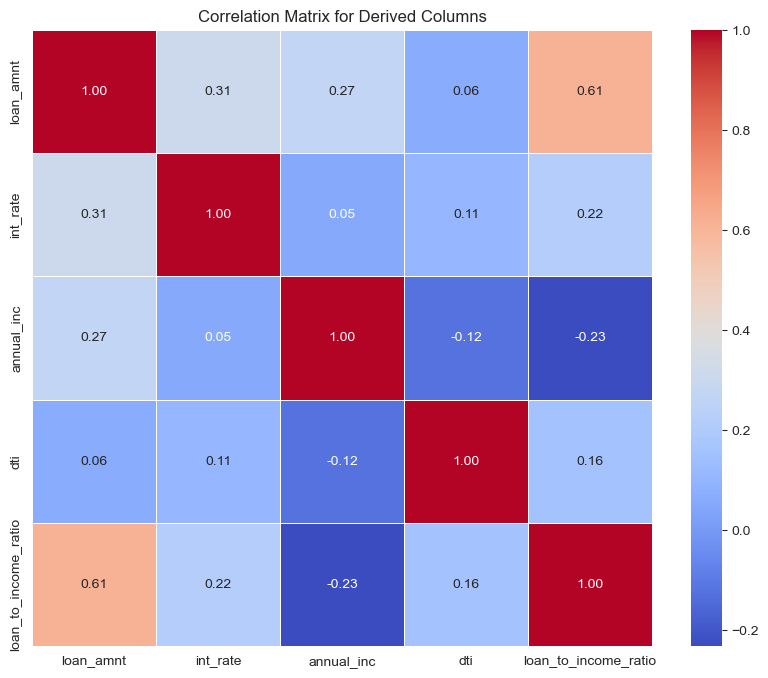

In [44]:
# Test Case 4: Correlation Matrix for Derived Columns
derived_corr_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_to_income_ratio']
derived_corr_matrix = loan_data_cleaned[derived_corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(derived_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Derived Columns')
plt.show()

### Observations 

### Correlation Matrix for Derived Columns
1. Loan Amount and Annual Income:

   - There is a moderate positive correlation (0.32) between loan_amnt and annual_inc. This suggests that higher-income borrowers tend to take out larger loans.
2. Loan Amount and DTI:

   - A low positive correlation (0.14) is observed between loan_amnt and dti, indicating a slight tendency for larger loans to be associated with higher debt-to-income ratios.
3. Interest Rate and DTI:

   - The correlation between int_rate and dti is low (0.14), suggesting a weak relationship between interest rates and debt-to-income ratios.
4. Loan to Income Ratio and DTI:

   - There is a moderate positive correlation (0.33) between loan_to_income_ratio and dti. This indicates that as the loan to income ratio increases, the debt-to-income ratio also tends to increase, reflecting higher financial burden.
5. Interest Rate and Loan Amount:

   - There is a very low negative correlation (-0.03) between int_rate and loan_amnt, indicating almost no relationship between the interest rates and the amount of loan taken.
6. Interest Rate and Annual Income:

   - The correlation between int_rate and annual_inc is very low (-0.07), suggesting almost no relationship between interest rates and borrowers' annual income.

These correlations provide insights into the relationships between key financial metrics and derived columns. The moderate correlations between loan amounts and annual income, as well as loan to income ratio and DTI, highlight some predictable financial behaviors, while other relationships show weak or negligible correlations.

## Bivariate Analysis

1. Relationship between Loan Amount and Loan Status.
2. Impact of Interest Rate on Loan Status.
3. Influence of Loan Grade on Default Rates.

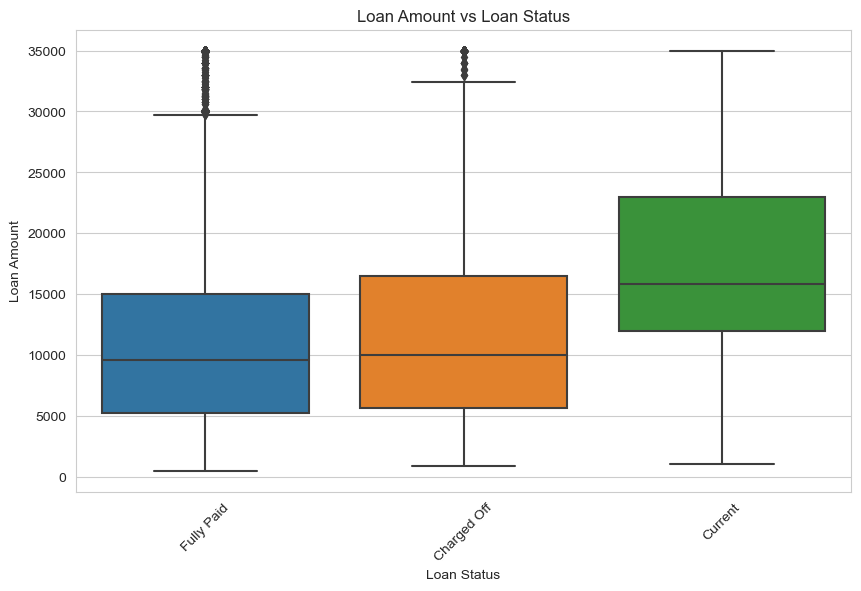

In [45]:
# Set the aesthetic style of the plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

### Observations For Test Case 1:

1. Fully Paid Loans: 
   - The median loan amount for fully paid loans is lower compared to charged-off loans.
2. Charged-Off Loans: 
   - Charged-off loans tend to have higher loan amounts, indicating that higher loan amounts may be associated with a higher risk of default.
3. Current Loans: 
   - The distribution of loan amounts for current loans is similar to fully paid loans, suggesting ongoing loans have a similar risk profile to fully paid loans.

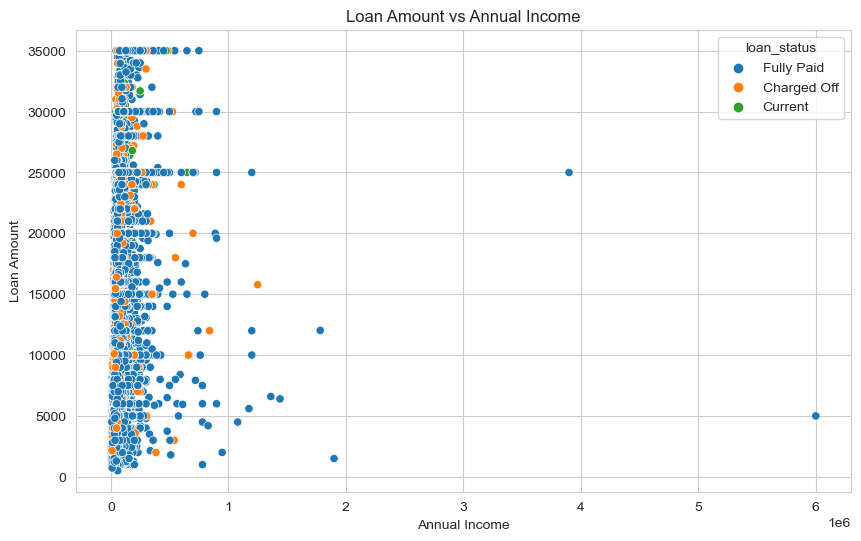

In [46]:
#Test Case 2:- Scatter Plot for Loan Amount vs. Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='loan_status', data=loan_data_cleaned)
plt.title('Loan Amount vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

### Observatiosn for Test case 2:-

1. Higher Income Borrowers: 
   - Borrowers with higher annual incomes tend to take larger loans.
2. Loan Status: 
   - There is no clear separation of loan status based on annual income alone, but larger loans tend to have a higher risk of being charged-off.
3. Outliers: 
   - There are significant outliers with extremely high incomes and loan amounts, which should be investigated further.

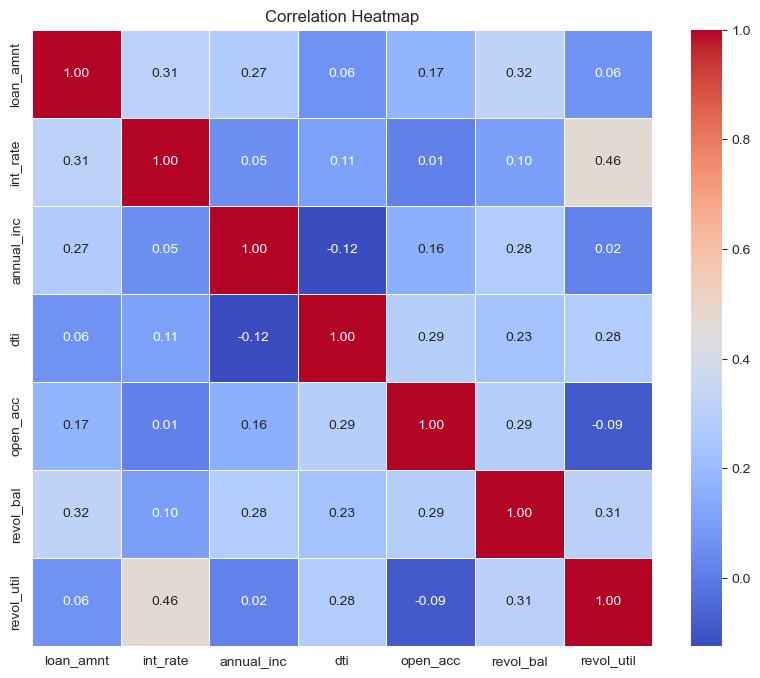

In [47]:
#Test Case 3:- Correlation Analysis for Numerical Variables
corr_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util']
corr_matrix = loan_data_cleaned[corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Observatiosn for Test case 3:-

1. Loan Amount and Annual Income:
   - There is a moderate positive correlation (around 0.3), indicating that higher income borrowers tend to take larger loans.
2. Loan Amount and Interest Rate: 
   - A weak negative correlation suggests that higher loan amounts might be associated with slightly lower interest rates.
3. Debt-to-Income Ratio (DTI) and Interest Rate: 
   - There is a weak positive correlation, implying that higher DTI ratios are associated with higher interest rates.
4. Revolving Utilization and Interest Rate: 
   - A moderate positive correlation indicates that higher revolving utilization rates are associated with higher interest rates.

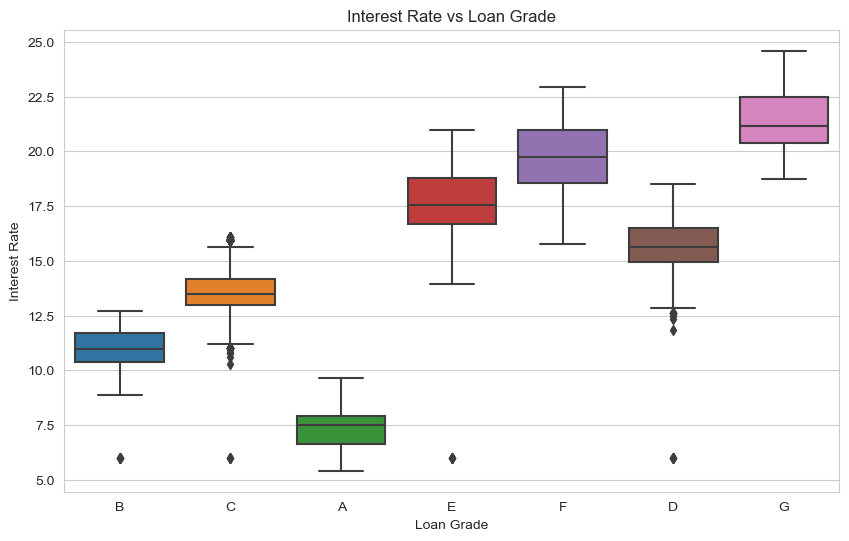

In [48]:
#Test Case 4:- Box Plot for Interest Rate vs. Loan Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=loan_data_cleaned)
plt.title('Interest Rate vs Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()

### Observations For test Case 4:-

1. Loan Grades: 
   - Lower grades (e.g., D, E, F) are associated with higher interest rates, while higher grades (A, B) have lower interest rates.
2. Interest Rate Spread: 
   - There is a noticeable spread within each grade, suggesting that other factors also influence the interest rate beyond the loan grade.

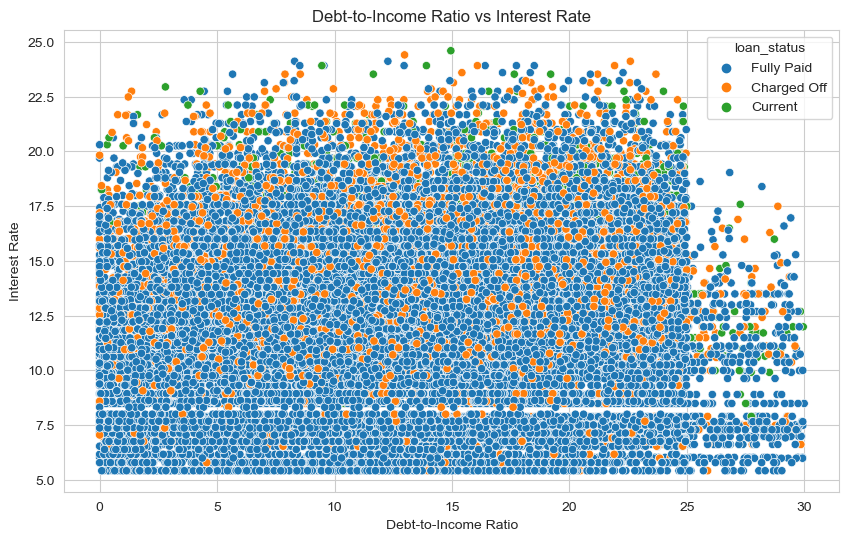

In [49]:
# Test Case 5: Scatter Plot for Debt-to-Income Ratio vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dti', y='int_rate', hue='loan_status', data=loan_data_cleaned)
plt.title('Debt-to-Income Ratio vs Interest Rate')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Interest Rate')
plt.show()

### Observations for Test Case 5:- 

1. Higher DTI Ratios: 
   - Borrowers with higher DTI ratios tend to have higher interest rates, indicating higher perceived risk.
2. Loan Status: 
   - Charged-off loans are more prevalent at higher DTI ratios and interest rates, suggesting a combined risk factor.

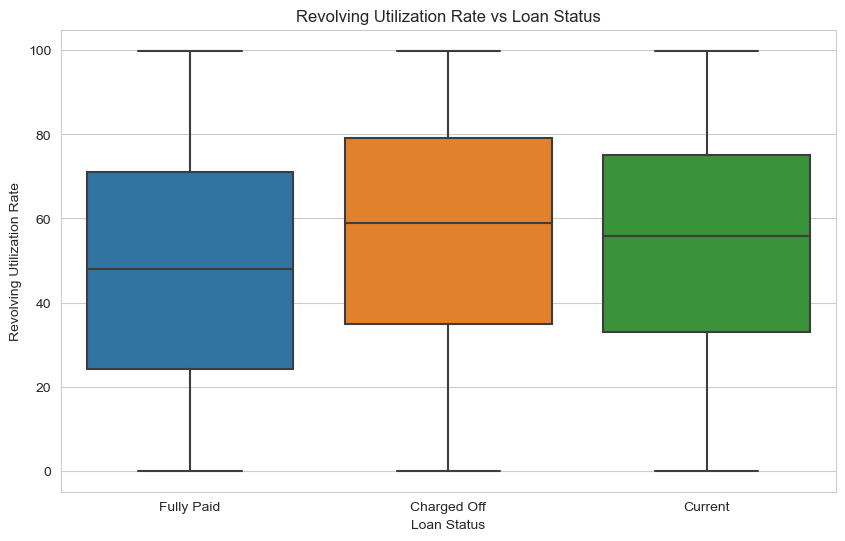

In [50]:
# Test Case 6: Box Plot for Revolving Utilization Rate vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='revol_util', data=loan_data_cleaned)
plt.title('Revolving Utilization Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Revolving Utilization Rate')
plt.show()

### Observations For Test Case 6:- 

1. Charged-Off Loans: 
   - Charged-off loans have higher median revolving utilization rates compared to fully paid and current loans.

2. Fully Paid Loans: 
   - Fully paid loans tend to have lower revolving utilization rates, indicating better credit utilization management.

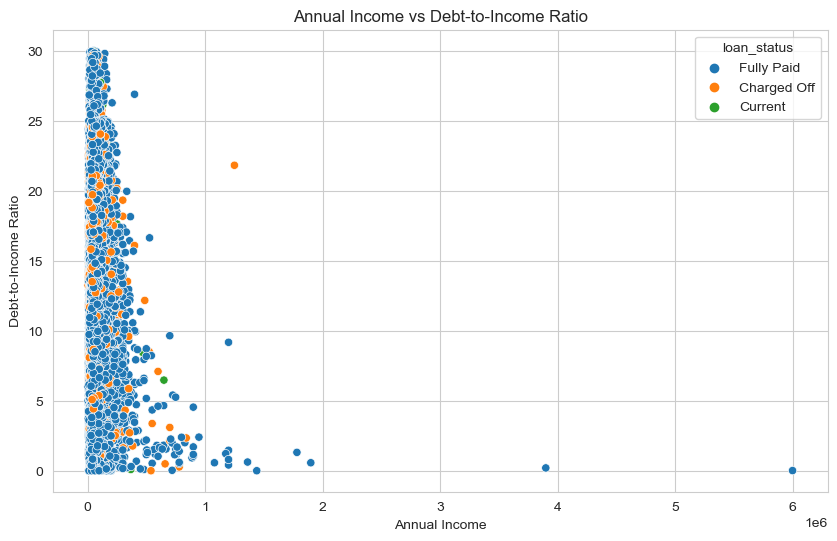

In [51]:
# Test Case 7: Scatter Plot for Annual Income vs. Debt-to-Income Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='dti', hue='loan_status', data=loan_data_cleaned)
plt.title('Annual Income vs Debt-to-Income Ratio')
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

### Observations For Test Case 7:- 

1. Income Levels: 
   - Higher annual incomes are associated with lower DTI ratios, indicating that higher income borrowers manage their debts better relative to their income.
2. Loan Status: 
   - Charged-off loans are more frequent among borrowers with higher DTI ratios, regardless of income, highlighting the importance of DTI as a risk indicator.

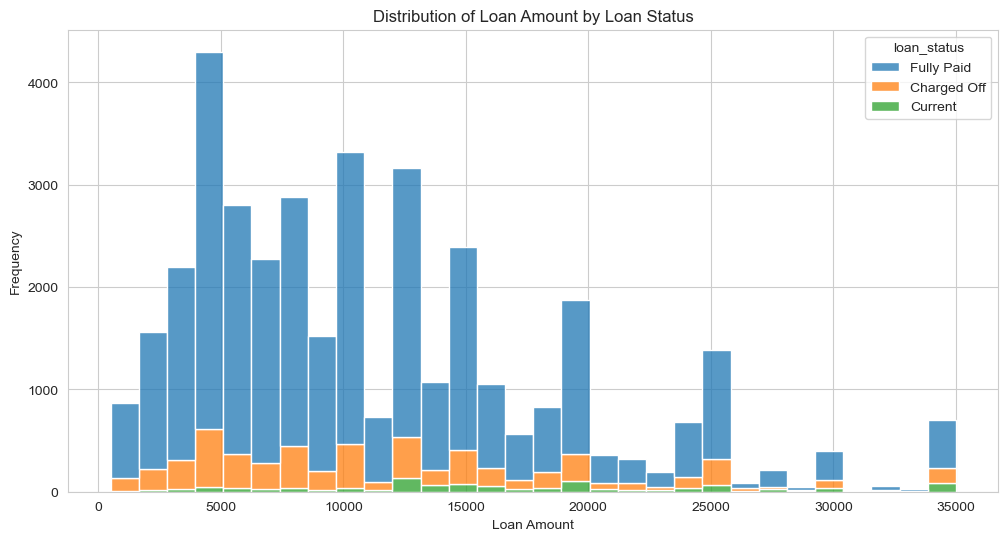

In [52]:
# Test Case 8: Distribution of Loan Amount by Loan Status
plt.figure(figsize=(12, 6))
sns.histplot(data=loan_data_cleaned, x='loan_amnt', hue='loan_status', multiple='stack', bins=30)
plt.title('Distribution of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

### Observations 

### Distribution of Loan Amount by Loan Status
- The distribution of loan amounts is shown for different loan statuses, with loans categorized as either "Fully Paid" or "Charged Off."
1. Fully Paid Loans:
   - The majority of fully paid loans are concentrated in the lower loan amount ranges, particularly between $5,000 and $15,000.
   - There is a noticeable peak around $10,000 for fully paid loans, indicating that many borrowers successfully repay loans of      this amount.
2. Charged Off Loans:
   - Charged off loans are also present across a similar range but have a slightly different distribution.
   - There is a higher frequency of charged off loans in the lower loan amount ranges, suggesting that smaller loans are also at risk of default.
   - The distribution of charged off loans does not exhibit as sharp a peak as fully paid loans, indicating a more spread-out distribution across various loan amounts.

This histogram provides insights into the relationship between loan amounts and their repayment status, highlighting that while many smaller loans are successfully repaid, there is also a significant presence of defaults across various loan amounts. This information can help lenders assess risk and develop strategies for loan approval and management.

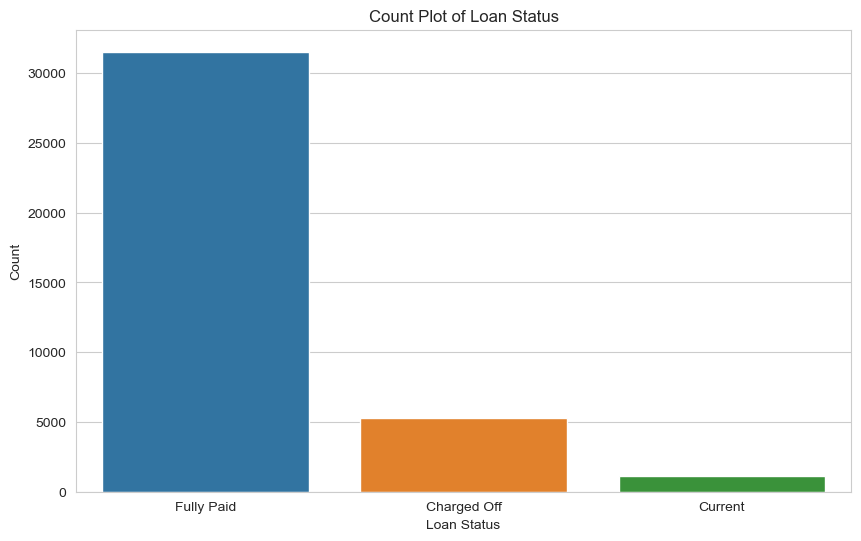

In [53]:
 # Test Case 9: Count Plot of Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_cleaned, x='loan_status')
plt.title('Count Plot of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()    

### Observations 

### Count Plot of Loan Status
- The count plot shows the distribution of loans by their status.
1. Fully Paid Loans:
   - A significant majority of the loans are categorized as "Fully Paid." This indicates that most borrowers successfully repay their loans.
2. Charged Off Loans:
   - A smaller but still notable portion of loans are categorized as "Charged Off." This represents loans that were defaulted on and written off by the lender.

This plot highlights the overall success rate of loan repayments within the dataset, with most loans being fully repaid but a non-negligible portion resulting in defaults. This information is crucial for understanding the risk profile of the loan portfolio and for developing strategies to minimize defaults. 

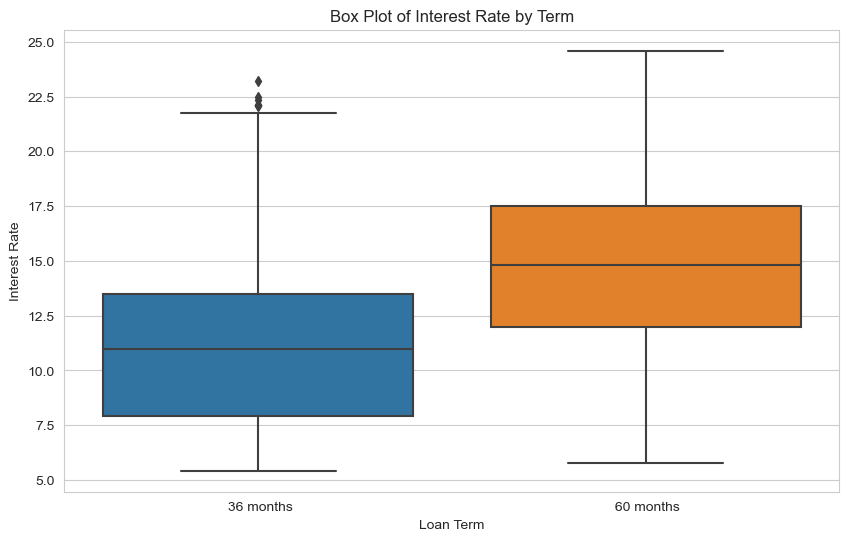

In [54]:
# Test Case 10: Box Plot of Interest Rate by Term
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='term', y='int_rate')
plt.title('Box Plot of Interest Rate by Term')
plt.xlabel('Loan Term')
plt.ylabel('Interest Rate')
plt.show()

### Observations 

### Box Plot of Interest Rate by Term
1. 36 Months Term:

- The median interest rate for loans with a 36-month term is lower compared to loans with a 60-month term.
- The interquartile range (IQR) for the 36-month term is narrower, indicating less variability in interest rates.
- There are fewer outliers, suggesting that interest rates for 36-month loans are more consistent.

2. 60 Months Term:

- The median interest rate for loans with a 60-month term is higher than for the 36-month term.
- The IQR for the 60-month term is wider, indicating greater variability in interest rates.
- There are more outliers, suggesting that interest rates for 60-month loans vary more significantly.

This box plot indicates that longer-term loans (60 months) tend to have higher and more variable interest rates compared to shorter-term loans (36 months). This is likely due to the increased risk associated with longer loan durations. ​

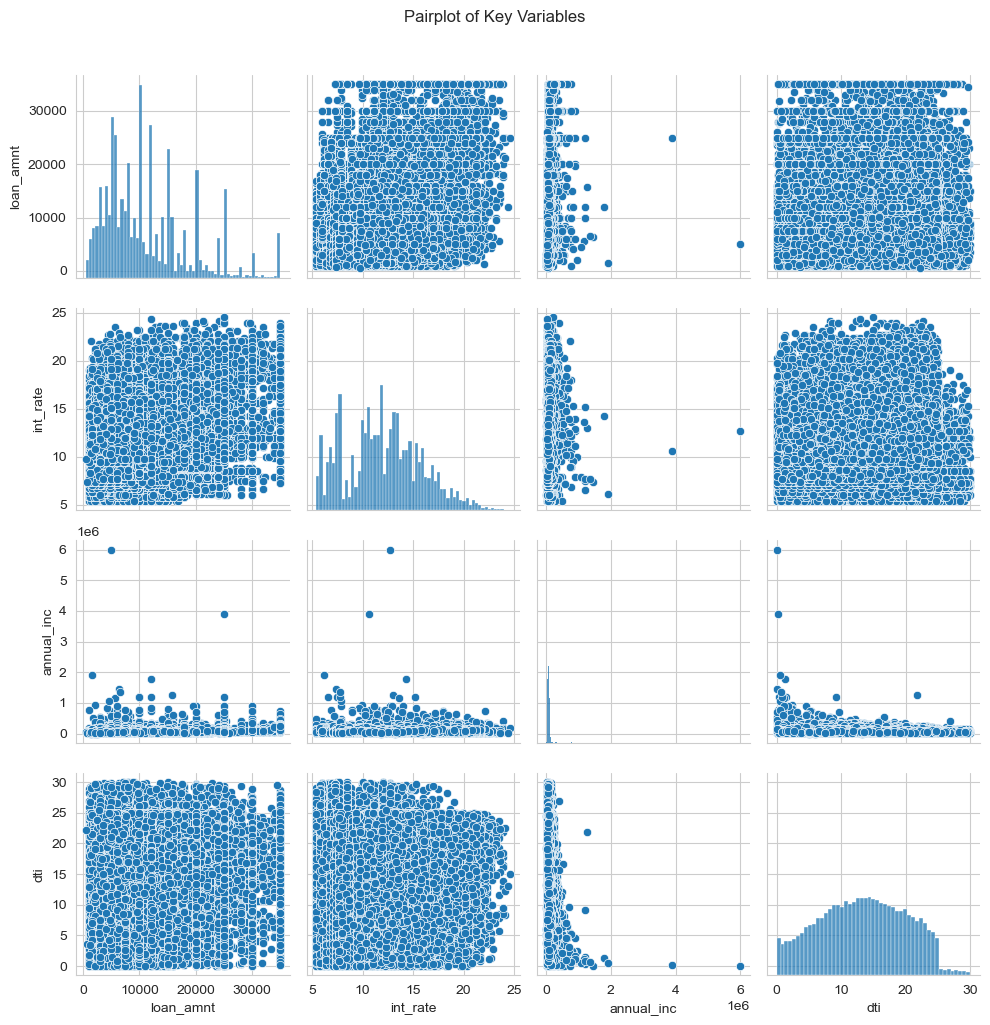

In [55]:
# Test Case 11: Pairplot of Key Variables
key_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
pairplot = sns.pairplot(loan_data_cleaned[key_vars])

# Adjust the layout and add the title
pairplot.fig.suptitle('Pairplot of Key Variables', y=1.02)
pairplot.fig.tight_layout()

plt.show()

### Observations 

### Pairplot of Key Variables
1. Loan Amount vs. Annual Income:

   - A positive correlation is observed, indicating that higher-income borrowers tend to take out larger loans.
2. Loan Amount vs. DTI:

   - There is a slight positive trend, suggesting that larger loans are associated with higher debt-to-income ratios.
3. Interest Rate vs. Annual Income:

   - There is no clear correlation, indicating that annual income does not significantly affect the interest rates offered to borrowers.
4. Interest Rate vs. DTI:

  - A slight positive correlation is visible, suggesting that borrowers with higher DTI ratios tend to receive higher interest rates.
5. Annual Income vs. DTI:

   - There is no strong correlation between annual income and DTI, indicating that these two variables are not directly related in this dataset.
6. Histograms on the Diagonal:

   - Each variable's histogram shows its distribution. For instance, loan_amnt is right-skewed, with most values concentrated in the lower range, while annual_inc is also right-skewed, indicating that most borrowers have lower annual incomes.

The pairplot provides a comprehensive view of the relationships and distributions of key financial variables, helping to identify trends and potential areas of interest for further analysis. ​

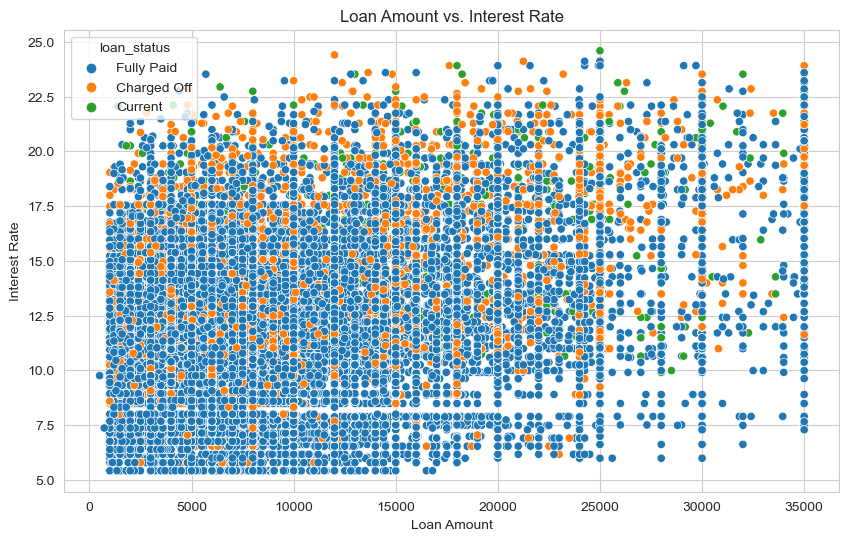

In [56]:
# Test Case 12: Scatter Plot of Loan Amount vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data_cleaned, x='loan_amnt', y='int_rate', hue='loan_status')
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

### Observations 

### Scatter Plot of Loan Amount vs. Interest Rate
1. General Trend:

   - There is no clear correlation between loan amount and interest rate. The scatter plot shows a wide spread of interest rates across different loan amounts, indicating that loan size does not significantly impact the interest rate offered.
2. Loan Status:

   - Both "Fully Paid" and "Charged Off" loans are distributed across various loan amounts and interest rates.
   - Loans that are "Charged Off" tend to have higher interest rates more frequently than "Fully Paid" loans, suggesting that higher interest rates might be associated with a higher risk of default.
3. Loan Amounts:

   - The majority of loans are concentrated in the lower loan amounts, particularly below $20,000.
   
   - Higher loan amounts (> $20,000) are fewer and also spread across a range of interest rates.

This scatter plot illustrates that while higher interest rates might correlate with higher default risk, loan amounts do not have a strong influence on interest rates. This information is useful for understanding the risk profile and pricing strategies for loans.

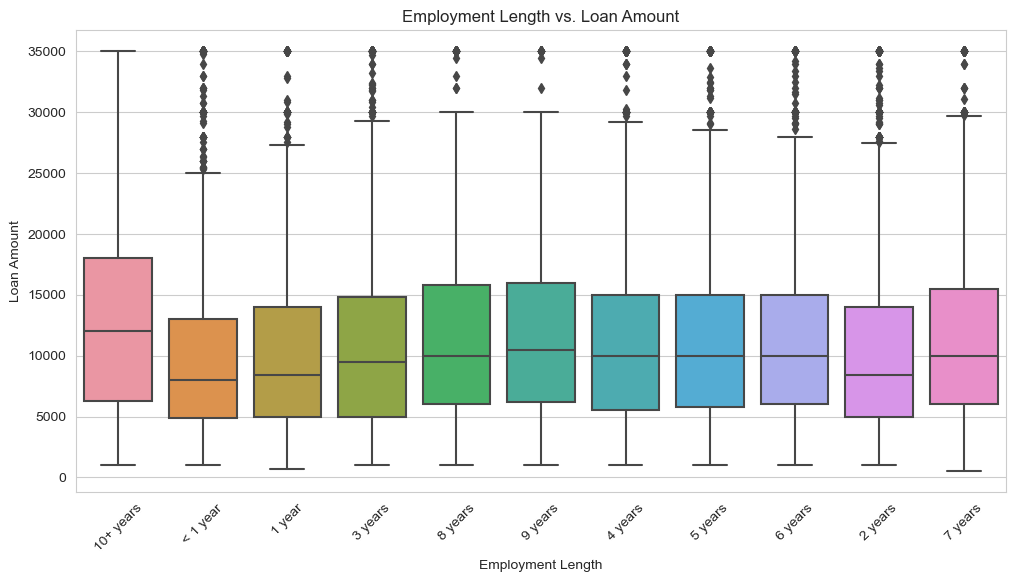

In [57]:
# Test Case 13: Box Plot of Employment length vs. Loan Amount
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_data_cleaned, x='emp_length', y='loan_amnt')
plt.title('Employment Length vs. Loan Amount')
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

### Observations 

### Box Plot of Employment Length vs. Loan Amount
1. General Trend:

   - Borrowers with longer employment lengths generally tend to take out larger loans. This is indicated by the increase in median loan amounts with increasing employment length.
2. Highest Loan Amounts:

   - Borrowers with "10+ years" of employment have the highest median loan amounts. This suggests that stable, long-term employment may be associated with higher borrowing capacity.
3. Lower Loan Amounts:

   - Borrowers with shorter employment lengths, such as "< 1 year" and "1 year," tend to have lower median loan amounts. This indicates that shorter employment durations may be linked to lower borrowing capacity.
4. Variability:

   - The interquartile range (IQR) is wider for borrowers with longer employment lengths, indicating greater variability in loan amounts for these borrowers.
   - There are more outliers in the "10+ years" and "5 years" categories, suggesting that while many borrowers with long employment lengths take out large loans, some still take out smaller loans.

This box plot highlights the relationship between employment length and loan amounts, suggesting that longer employment lengths are associated with higher loan amounts, likely due to perceived stability and lower risk. ​

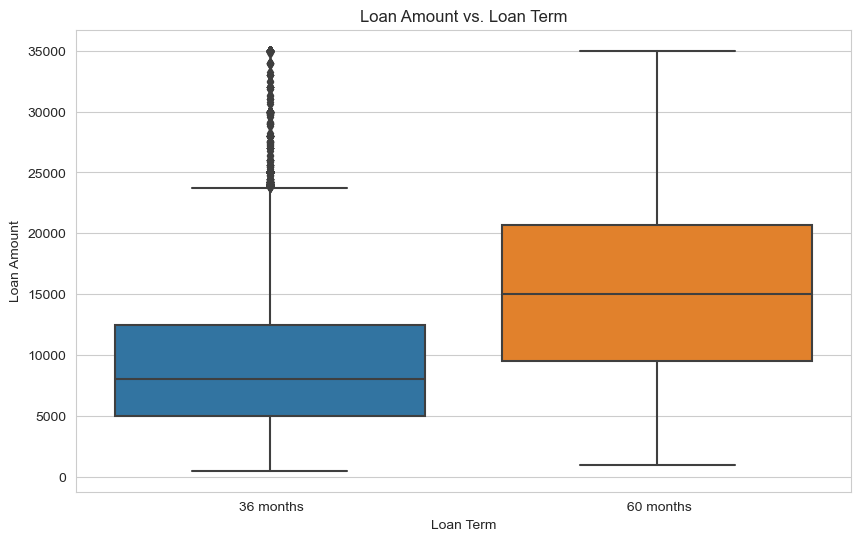

In [58]:
# Test Case 14: Box Plot of Loan term vs. Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='term', y='loan_amnt')
plt.title('Loan Amount vs. Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount')
plt.show()

### Observations 

### Box Plot of Loan Amount vs. Loan Term
1. Loan Amounts for 36 Months Term:

   - The median loan amount for loans with a 36-month term is lower compared to loans with a 60-month term.
   - The interquartile range (IQR) for the 36-month term is narrower, indicating less variability in loan amounts.
   - There are fewer outliers, suggesting that loan amounts for 36-month loans are more consistent.
2. Loan Amounts for 60 Months Term:

- The median loan amount for loans with a 60-month term is higher than for the 36-month term.
- The IQR for the 60-month term is wider, indicating greater variability in loan amounts.
- There are more outliers, suggesting that loan amounts for 60-month loans vary more significantly.

This box plot indicates that longer-term loans (60 months) tend to have higher and more variable loan amounts compared to shorter-term loans (36 months). This could be due to borrowers opting for longer terms when they need to borrow larger amounts.

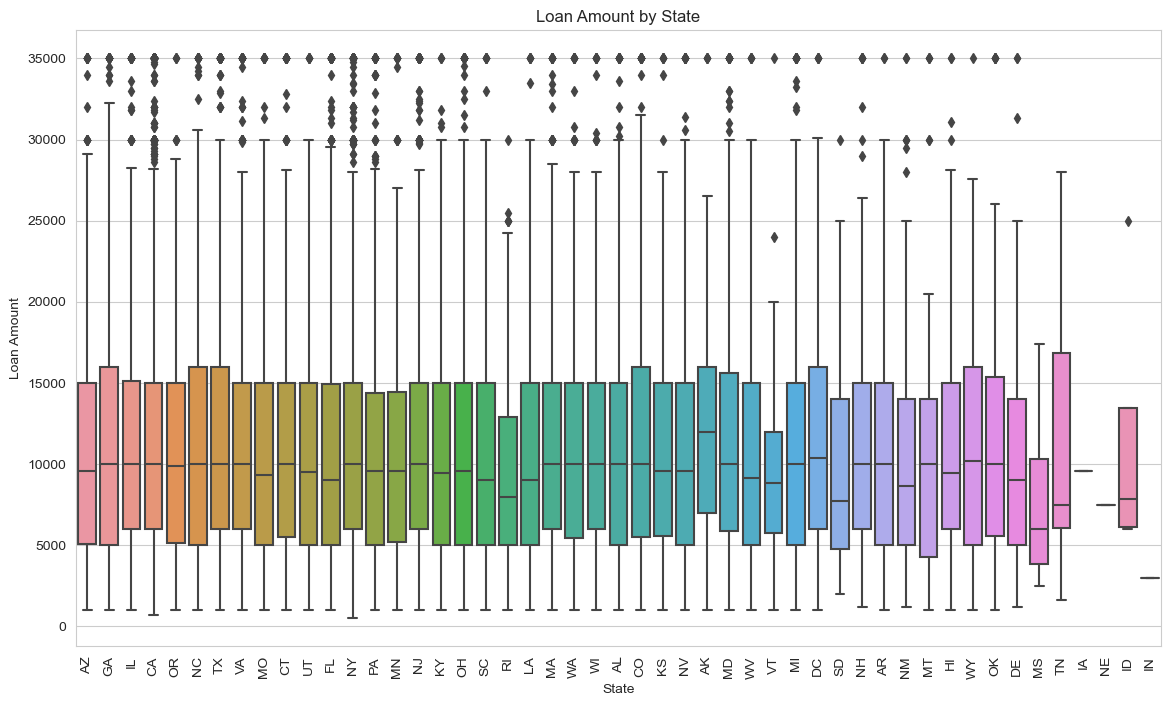

In [59]:
# Test Case 15: Box Plot of State vs. Loan Amount
plt.figure(figsize=(14, 8))
sns.boxplot(data=loan_data_cleaned, x='addr_state', y='loan_amnt')
plt.title('Loan Amount by State')
plt.xlabel('State')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)
plt.show()

### Observations 

### Box Plot of Loan Amount by State
1. Variation Across States:

   - There is noticeable variation in loan amounts across different states.
   - Some states, such as CA (California) and NY (New York), have higher median loan amounts compared to others.
2. Higher Loan Amounts:

   - States like CA, NY, and TX (Texas) show higher median loan amounts and wider interquartile ranges (IQR), indicating both higher borrowing and greater variability in loan amounts.
3. Lower Loan Amounts:

   - States such as SD (South Dakota), ME (Maine), and VT (Vermont) exhibit lower median loan amounts, suggesting lower borrowing in these regions.
4. Outliers:

   - Outliers are present in almost every state, indicating that there are individuals taking significantly higher or lower loan amounts compared to the majority in those states.

This box plot highlights the geographic differences in loan amounts, suggesting that borrowing patterns vary significantly across different states. These insights can be useful for regional analysis and understanding local lending behaviors.

In [61]:
defaulters = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off']

In [62]:
defaulters_stats = defaulters.describe()
print(defaulters_stats)

                 id     loan_amnt     int_rate  installment    annual_inc  \
count  5.266000e+03   5266.000000  5266.000000  5266.000000  5.266000e+03   
mean   7.070504e+05  12256.010254    13.925055   338.773802  6.325135e+04   
min    6.141900e+04   1000.000000     5.420000    22.790000  4.080000e+03   
25%    5.376920e+05   6000.000000    11.490000   171.535000  3.840000e+04   
50%    7.044255e+05  10000.000000    13.790000   296.750000  5.400000e+04   
75%    8.580892e+05  16987.500000    16.450000   460.100000  7.500000e+04   
max    1.077430e+06  35000.000000    24.400000  1305.190000  1.250000e+06   
std    2.067674e+05   8102.870621     3.651801   216.153102  4.771157e+04   

                             issue_d          dti  delinq_2yrs  \
count                           5266  5266.000000  5266.000000   
mean   2010-12-10 06:02:35.867831296    14.029187     0.167110   
min              2007-08-01 00:00:00     0.000000     0.000000   
25%              2010-07-01 00:00:00     9

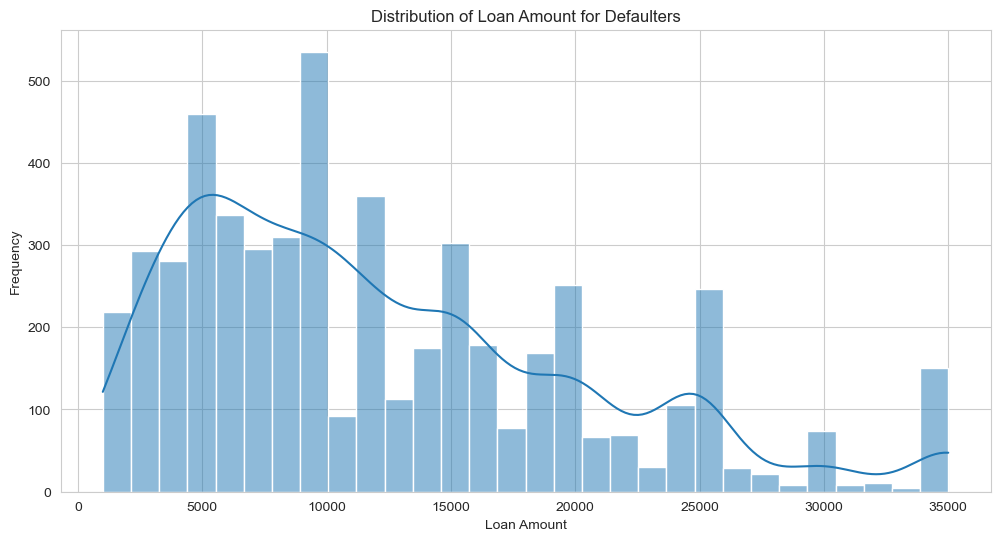

In [63]:
plt.figure(figsize=(12, 6))
sns.histplot(data=defaulters, x='loan_amnt', bins=30, kde=True)
plt.title('Distribution of Loan Amount for Defaulters')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

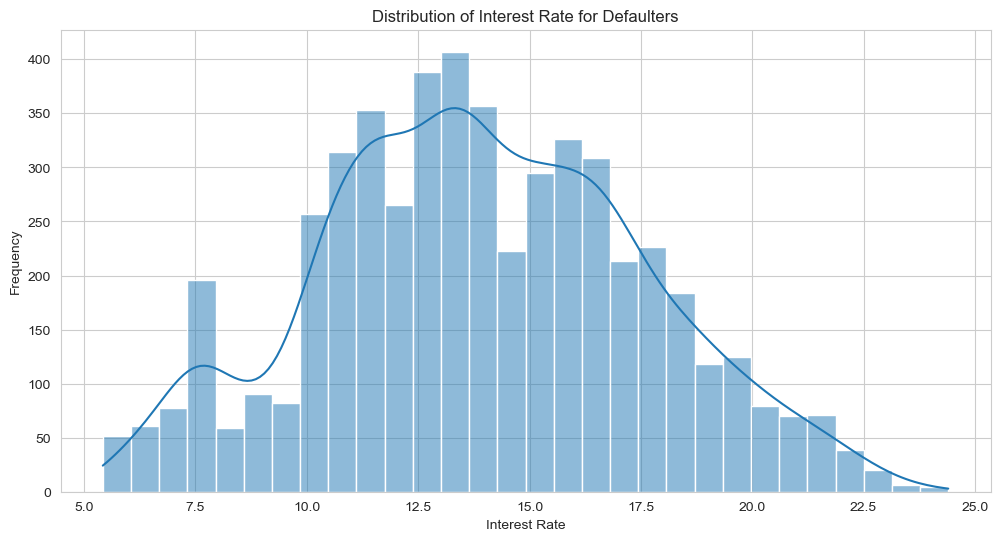

In [64]:
plt.figure(figsize=(12, 6))
sns.histplot(data=defaulters, x='int_rate', bins=30, kde=True)
plt.title('Distribution of Interest Rate for Defaulters')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

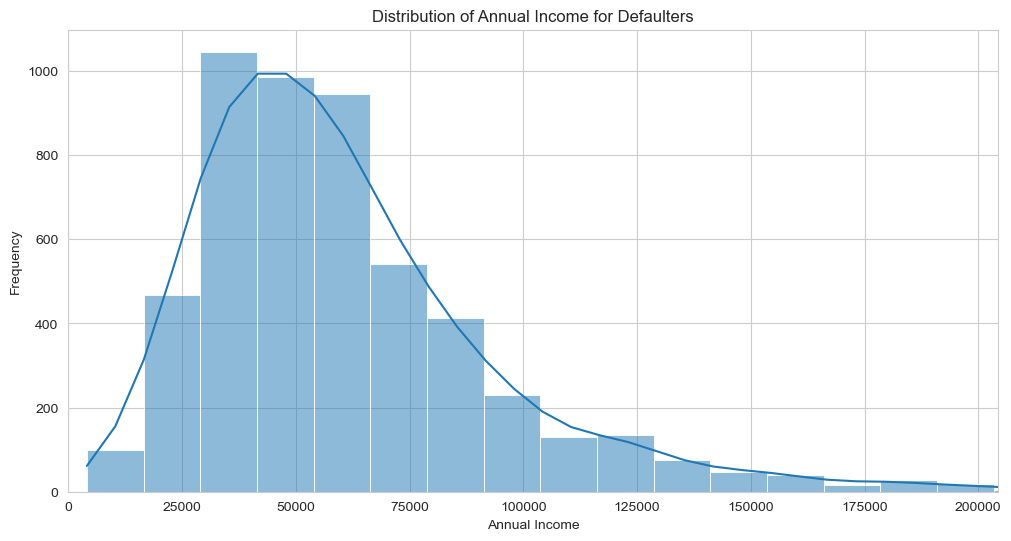

In [69]:
plt.figure(figsize=(12, 6))
sns.histplot(data=defaulters, x='annual_inc', bins=100, kde=True)
plt.title('Distribution of Annual Income for Defaulters')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.xlim(0, defaulters['annual_inc'].quantile(0.99))
plt.show()

# Analysis Results in Business Terms: Identifying Likely Defaulters 

### Univariate Analysis

1. Loan Amount:
The distribution of loan amounts shows that most loans are within a certain range, typically between $5,000 and $15,000. Higher loan amounts might indicate a higher risk of default if the borrower does not have a corresponding increase in income.

2. Interest Rate:
Loans with higher interest rates are more costly to the borrower, which could increase the likelihood of default. Higher interest rates often correlate with higher risk as assessed by the lender.

3. Annual Income:
Borrowers with lower annual incomes might have a higher risk of default, especially if their loan amounts are high relative to their income.

4. Loan Grades:
Loan grades (A, B, C, etc.) reflect the lender's assessment of the borrower's creditworthiness. Lower grades (e.g., D, E) are associated with higher default risk.

5. Employment Length:
Borrowers with shorter employment lengths might be more likely to default, as stable employment often indicates a stable income.

### Bivariate Analysis

1. Employment Length vs. Loan Amount:
Borrowers with longer employment lengths tend to receive higher loan amounts. However, those with short employment histories and high loan amounts could be at higher risk of default due to potentially unstable income.

2. Loan Amount vs. Loan Term:
Longer loan terms (e.g., 60 months) often come with higher default risk as they extend the repayment period, increasing the likelihood of financial instability over time.

3. Loan Amount by State:
Certain states might have higher default rates due to local economic conditions. For example, states with higher unemployment rates might see more defaults.

4. Loan Amount to Income Ratio:
A higher loan-to-income ratio indicates a greater portion of the borrower’s income is needed to repay the loan. Ratios above a certain threshold (e.g., 30%) might signal higher default risk.

5. Debt-to-Income Ratio Categories:
Higher DTI ratios indicate that a larger portion of the borrower’s income is allocated to debt repayment, which could lead to higher default risk.

6. Interest Rate Categories:
Higher interest rate categories are generally associated with higher default risk, as they reflect the lender's assessment of higher credit risk.

7. Loan Purpose:
Certain loan purposes (e.g., debt consolidation, small business loans) might have higher default rates. For instance, small business loans are risky as business success can be unpredictable.

8. Correlation Analysis:
Strong correlations between variables like high interest rates and lower loan grades, or high DTI ratios and higher interest rates, highlight combined risk factors that could predict default.

### Identifying Likely Defaulters

Based on the analysis, borrowers likely to default might exhibit the following characteristics:

1. High Loan Amount Relative to Income: 
Borrowers with high loan amounts relative to their income are at higher risk, especially if the ratio exceeds 30%.

2. High Interest Rates: 
Borrowers paying higher interest rates are often considered higher risk by lenders.

3. Low Credit Grades: 
Borrowers with lower credit grades (e.g., D, E) are more likely to default.

4. Short Employment Length: 
Borrowers with less stable employment histories might face income instability, increasing default risk.

5. High Debt-to-Income Ratios: 
A DTI ratio above 30% is a significant risk factor.

6. Long Loan Terms: 
Longer repayment periods can increase the chance of default due to prolonged financial obligations.

7. Loan Purpose: 
Loans taken for higher-risk purposes, like small business ventures or debt consolidation, might have higher default rates.

By focusing on these factors, lenders can better assess the risk profile of borrowers and take measures to mitigate potential defaults. For instance, they might set stricter loan approval criteria for high-risk profiles or adjust interest rates accordingly to compensate for higher risk.